# Iris Flower Classification 

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
#Loading Dataset
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']
# Load the data
df = pd.read_csv('iris.data.csv', names = columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No misisng data!!!")

In [5]:
#Visualize Data
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print(df.shape)

(150, 5)


In [7]:
print(df.dtypes)

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class_labels     object
dtype: object


In [8]:
df.nunique()

Sepal length    35
Sepal width     23
Petal length    43
Petal width     22
Class_labels     3
dtype: int64

In [9]:
print(df.columns)

Index(['Sepal length', 'Sepal width', 'Petal length', 'Petal width',
       'Class_labels'],
      dtype='object')


In [10]:
unique_values = df['Sepal length'].unique()
unique_values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [11]:
unique_values = df['Sepal width'].unique()
unique_values

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [12]:
unique_values = df['Petal length'].unique()
unique_values

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [13]:
unique_values = df['Petal width'].unique()
unique_values

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [14]:
unique_values = df['Class_labels'].unique()
unique_values

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
count_value = df['Class_labels'].value_counts()
count_setosa = count_value['Iris-setosa']
count_setosa

50

In [16]:
count_value = df['Class_labels'].value_counts()
count_versicolor = count_value['Iris-versicolor']
count_versicolor

50

In [17]:
count_value = df['Class_labels'].value_counts()
count_virginica = count_value['Iris-virginica']
count_virginica

50

Text(0.5, 1.0, 'Pairplot of Iris Data by Species')

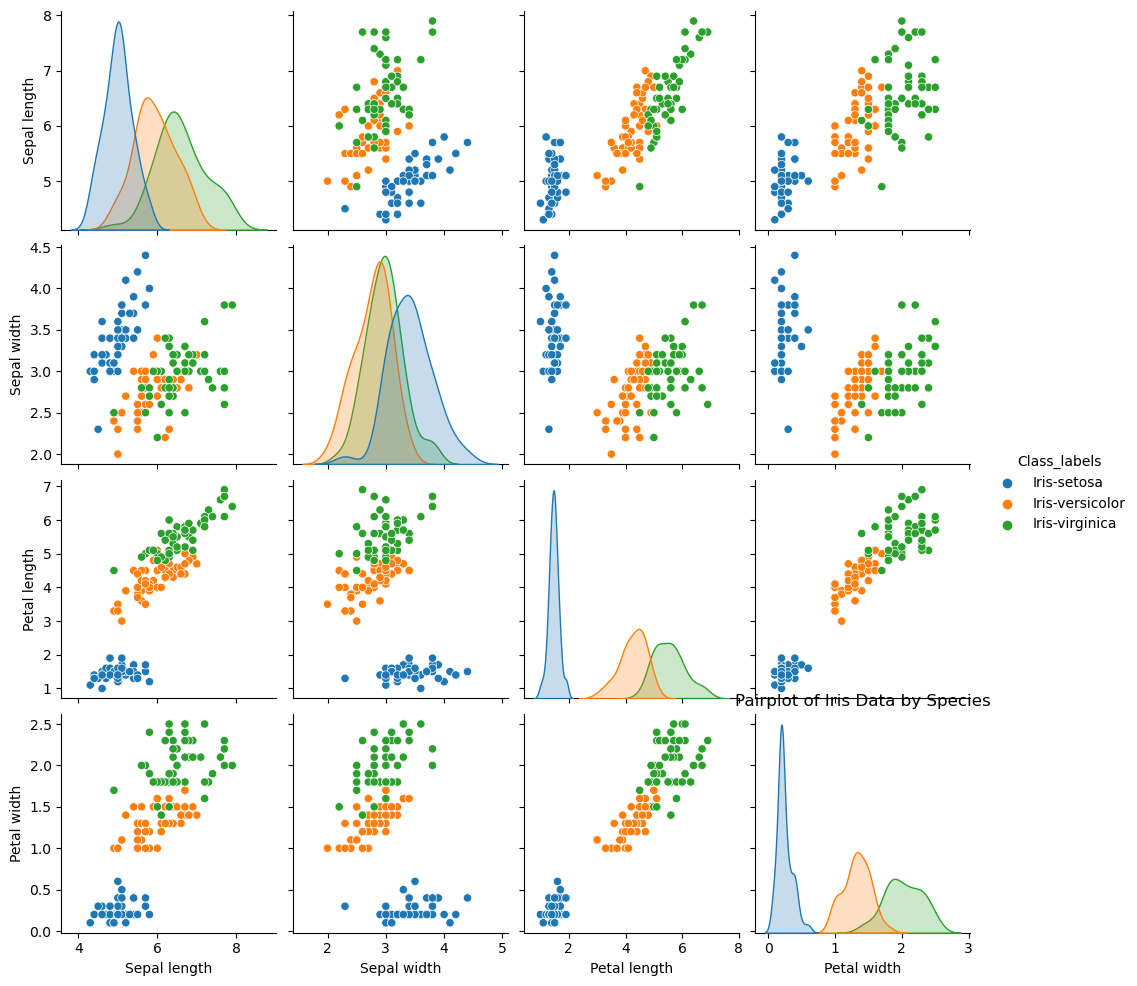

In [18]:
#Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')
plt.title('Pairplot of Iris Data by Species')

Text(0.5, 1.05, 'Box Plots of Iris Data by Species')

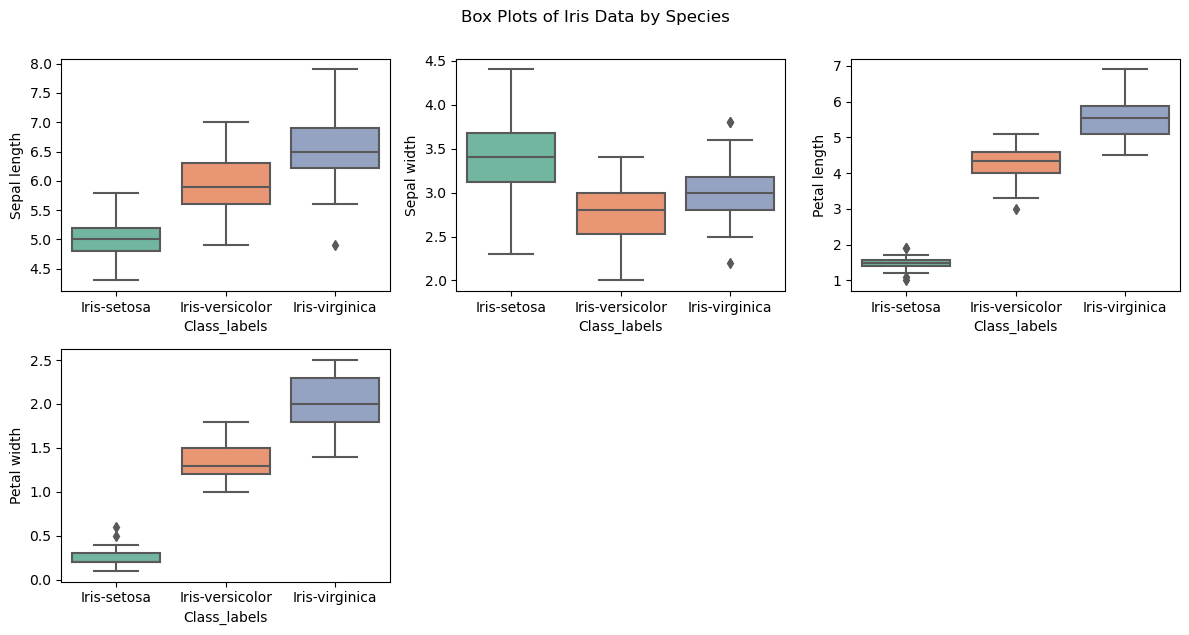

In [19]:
# Box plot for each feature
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(x='Class_labels', y='Sepal length', data=df, palette="Set2")
plt.subplot(2, 3, 2)
sns.boxplot(x='Class_labels', y='Sepal width', data=df, palette="Set2")
plt.subplot(2, 3, 3)
sns.boxplot(x='Class_labels', y='Petal length', data=df, palette="Set2")
plt.subplot(2, 3, 4)
sns.boxplot(x='Class_labels', y='Petal width', data=df, palette="Set2")
plt.tight_layout()
plt.suptitle('Box Plots of Iris Data by Species', y=1.05)

In [20]:
# Seperate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]
print()

In [21]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

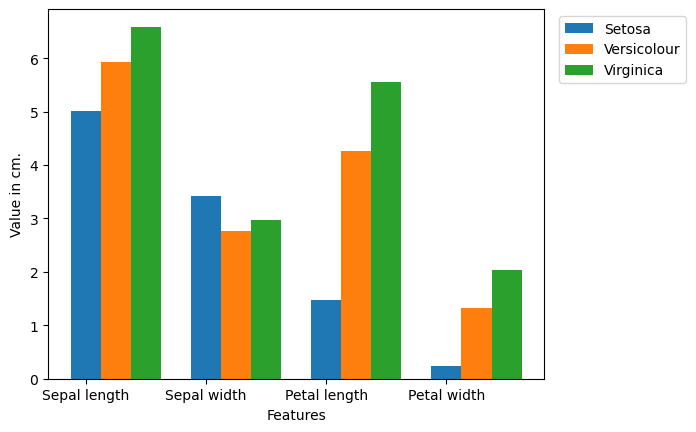

In [22]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [23]:
# Split the data to train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print(X_test)

[[6.2 2.2 4.5 1.5]
 [6.3 3.3 4.7 1.6]
 [6.3 2.5 4.9 1.5]
 [5.0 3.6 1.4 0.2]
 [5.8 2.7 5.1 1.9]
 [6.4 2.8 5.6 2.2]
 [6.3 2.3 4.4 1.3]
 [6.1 2.6 5.6 1.4]
 [5.4 3.9 1.7 0.4]
 [5.2 3.4 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [5.2 2.7 3.9 1.4]
 [5.0 3.5 1.3 0.3]
 [5.0 3.3 1.4 0.2]
 [7.7 2.8 6.7 2.0]
 [4.9 3.1 1.5 0.1]
 [5.8 2.6 4.0 1.2]
 [5.1 3.5 1.4 0.2]
 [6.9 3.1 5.4 2.1]
 [6.8 3.2 5.9 2.3]
 [7.9 3.8 6.4 2.0]
 [4.7 3.2 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [6.7 3.0 5.0 1.7]
 [4.6 3.1 1.5 0.2]
 [7.7 3.0 6.1 2.3]
 [6.7 2.5 5.8 1.8]
 [5.6 3.0 4.5 1.5]
 [5.4 3.7 1.5 0.2]
 [6.8 2.8 4.8 1.4]]


In [24]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
prediction = model_DTC.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction))

0.9333333333333333


In [26]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [27]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [30]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.87

Confusion Matrix:
[[12  0  0]
 [ 0  6  3]
 [ 0  1  8]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      0.67      0.75         9
 Iris-virginica       0.73      0.89      0.80         9

       accuracy                           0.87        30
      macro avg       0.86      0.85      0.85        30
   weighted avg       0.88      0.87      0.86        30



# Image to Pencil Sketch

In [31]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

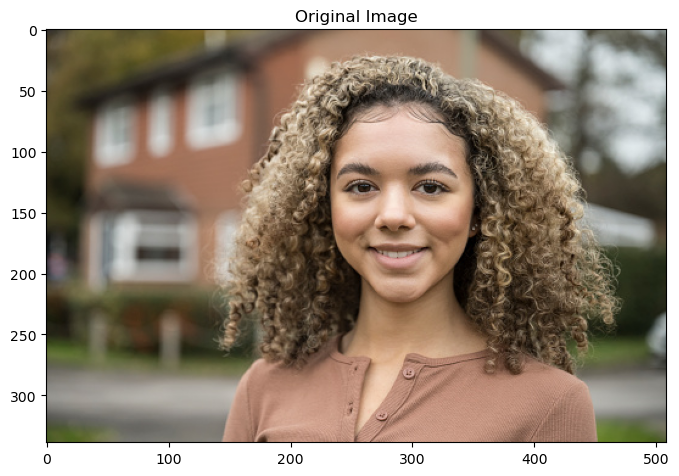

In [32]:
img = cv2.imread("Girl.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("on")
plt.title("Original Image")
plt.show()

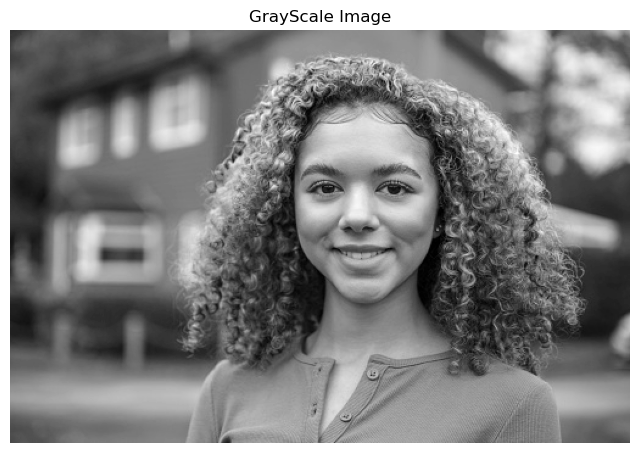

In [33]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(img_gray,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.show()

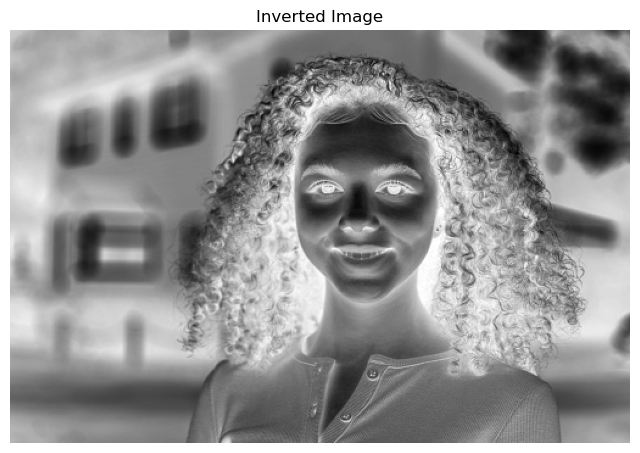

In [34]:
img_invert = cv2.bitwise_not(img_gray)
plt.figure(figsize=(8,8))
plt.imshow(img_invert,cmap="gray")
plt.axis("off")
plt.title("Inverted Image")
plt.show()

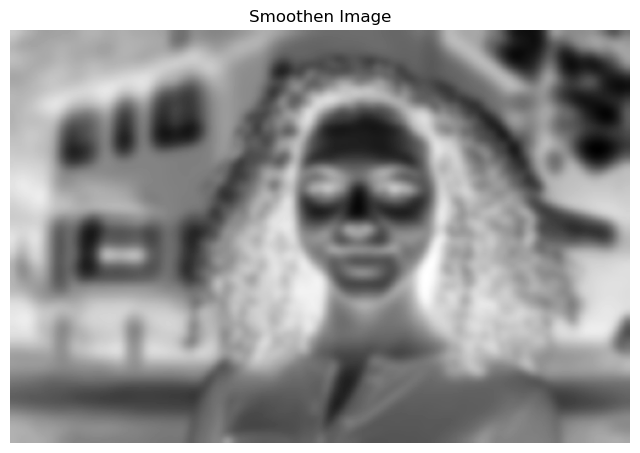

In [35]:
img_smoothing = cv2.GaussianBlur(img_invert, (21, 21),sigmaX=0, sigmaY=0)
plt.figure(figsize=(8,8))
plt.imshow(img_smoothing,cmap="gray")
plt.axis("off")
plt.title("Smoothen Image")
plt.show()

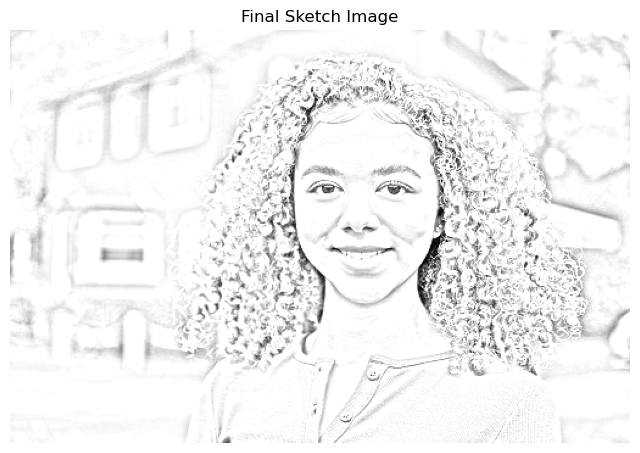

In [36]:
final = cv2.divide(img_gray, 255 - img_smoothing, scale=255)
plt.figure(figsize=(8,8))
plt.imshow(final,cmap="gray")
plt.axis("off")
plt.title("Final Sketch Image")
plt.show()

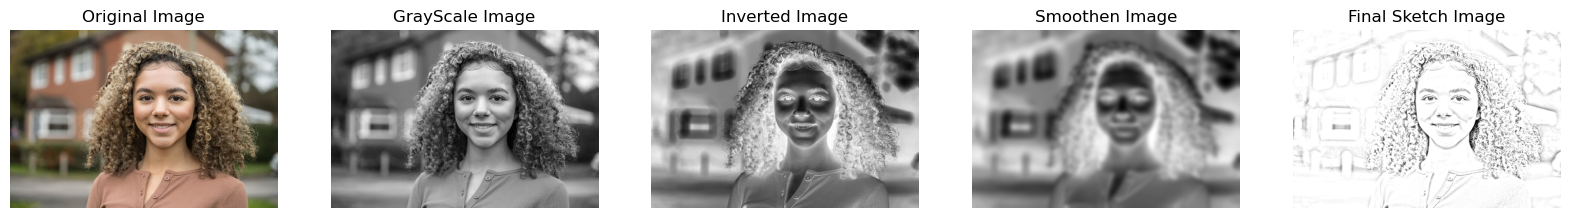

In [37]:
plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.subplot(1,5,2)
plt.imshow(img_gray,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.subplot(1,5,3)
plt.imshow(img_invert,cmap="gray")
plt.axis("off")
plt.title("Inverted Image")
plt.subplot(1,5,4)
plt.imshow(img_smoothing,cmap="gray")
plt.axis("off")
plt.title("Smoothen Image")
plt.subplot(1,5,5)
plt.imshow(final,cmap="gray")
plt.axis("off")
plt.title("Final Sketch Image")
plt.show()

# Prediction using Decision Tree

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data[:,:]
y = iris.target

In [40]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [41]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [42]:
print(len(x),len(y))

150 150


In [43]:
data = pd.DataFrame(iris['data'],columns=['Petal length','Petal width','Sepal length','Sepal width'])
data['Species'] = iris['target']
data['Species'] = data['Species'].apply(lambda x:iris['target_names'][x])  

In [44]:
data.head()

,Petal length,Petal width,Sepal length,Sepal width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
data.tail()

,Petal length,Petal width,Sepal length,Sepal width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [46]:
data.describe()

,Petal length,Petal width,Sepal length,Sepal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
data.shape

(150, 5)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal width   150 non-null    float64
 2   Sepal length  150 non-null    float64
 3   Sepal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
data.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_6632\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Petal length,Petal width,Sepal length,Sepal width
Petal length,1.000000,-0.117570,0.871754,0.817941
Petal width,-0.117570,1.000000,-0.428440,-0.366126
Sepal length,0.871754,-0.428440,1.000000,0.962865
Sepal width,0.817941,-0.366126,0.962865,1.000000


In [50]:
data.isnull().sum()

Petal length    0
Petal width     0
Sepal length    0
Sepal width     0
Species         0
dtype: int64

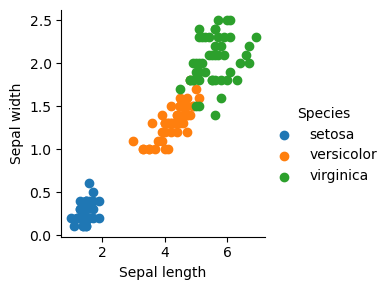

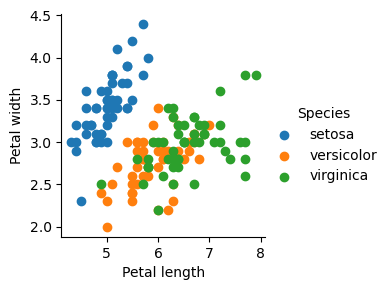

In [51]:
import seaborn as sns
from IPython.display import Image
#scatter plot between sepal lenth and sepal width
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal length','Sepal width').add_legend()
plt.show()
#scatter plot between petal lenth and sepal width
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal width').add_legend()
plt.show()

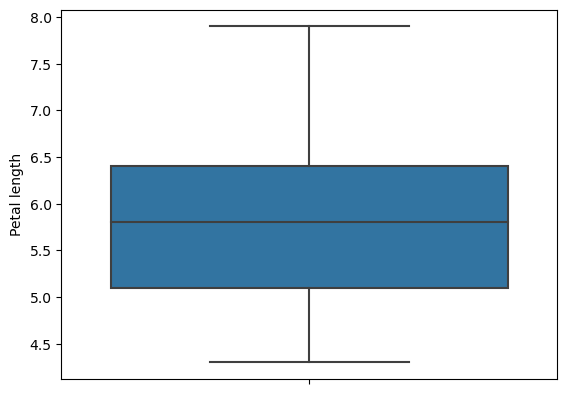

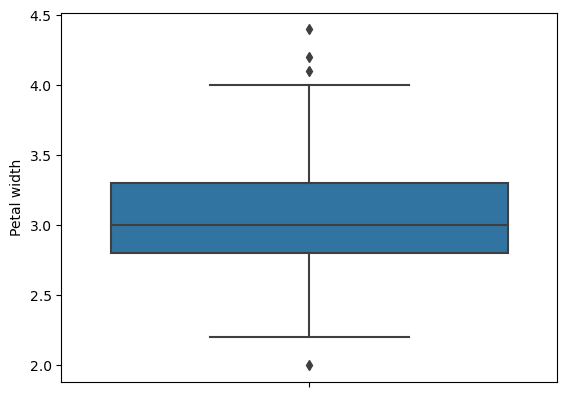

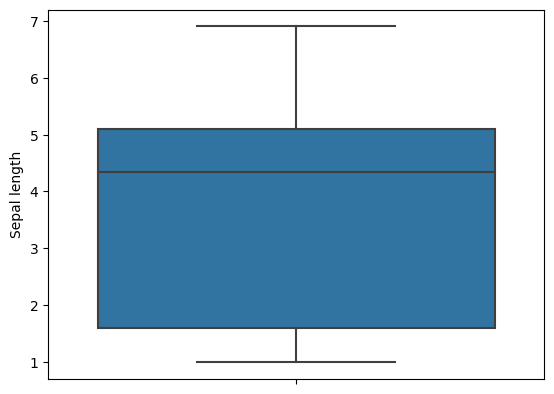

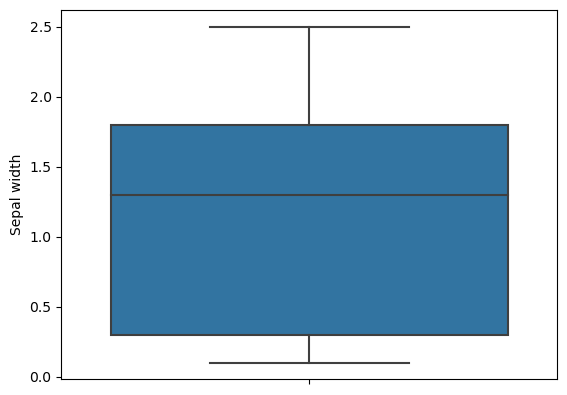

In [52]:
# To find outliers
cols = data.columns[0:-1]
for i in cols:
    sns.boxplot(y=data[i])
    plt.show()

In [53]:
# To remove outliers from 'Sepal width (cm)'
q1 = data['Sepal width'].quantile(0.25)
q3 = data['Sepal width'].quantile(0.75)
iqr = q3 - q1
data = data[(data['Sepal width'] >= q1-1.5*iqr) & (data['Sepal width'] <= q3+1.5*iqr)]
data.shape # To find out the number of rows and column after outlier treatment

(150, 5)

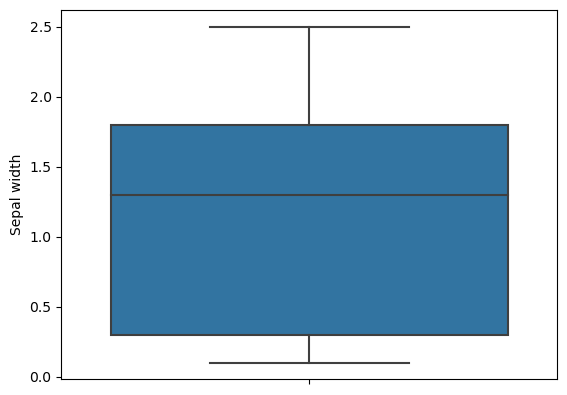

In [54]:
sns.boxplot(y=data['Sepal width'])
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6632\2251845388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


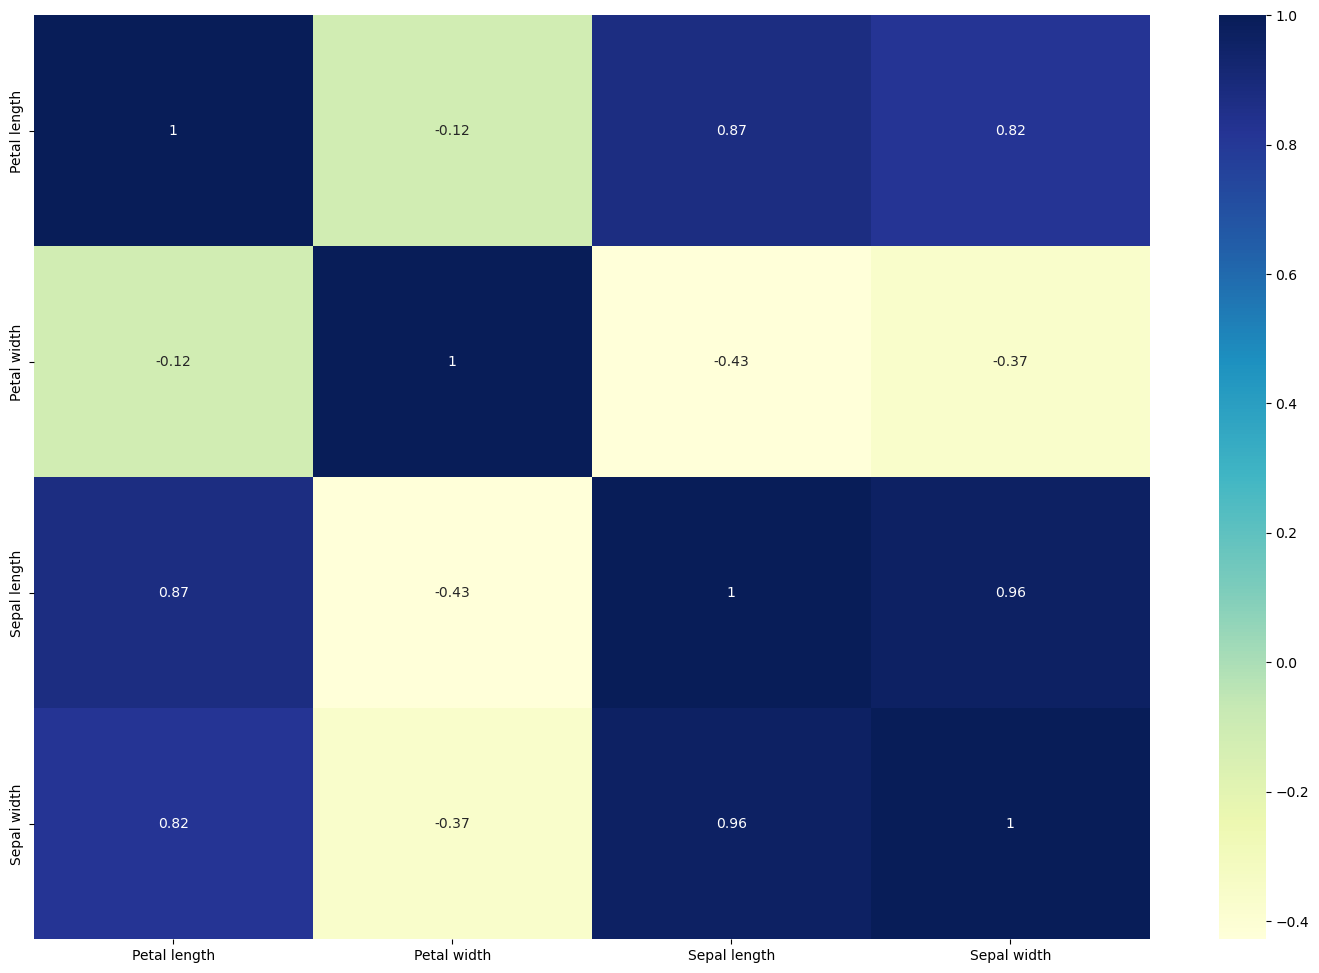

In [55]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

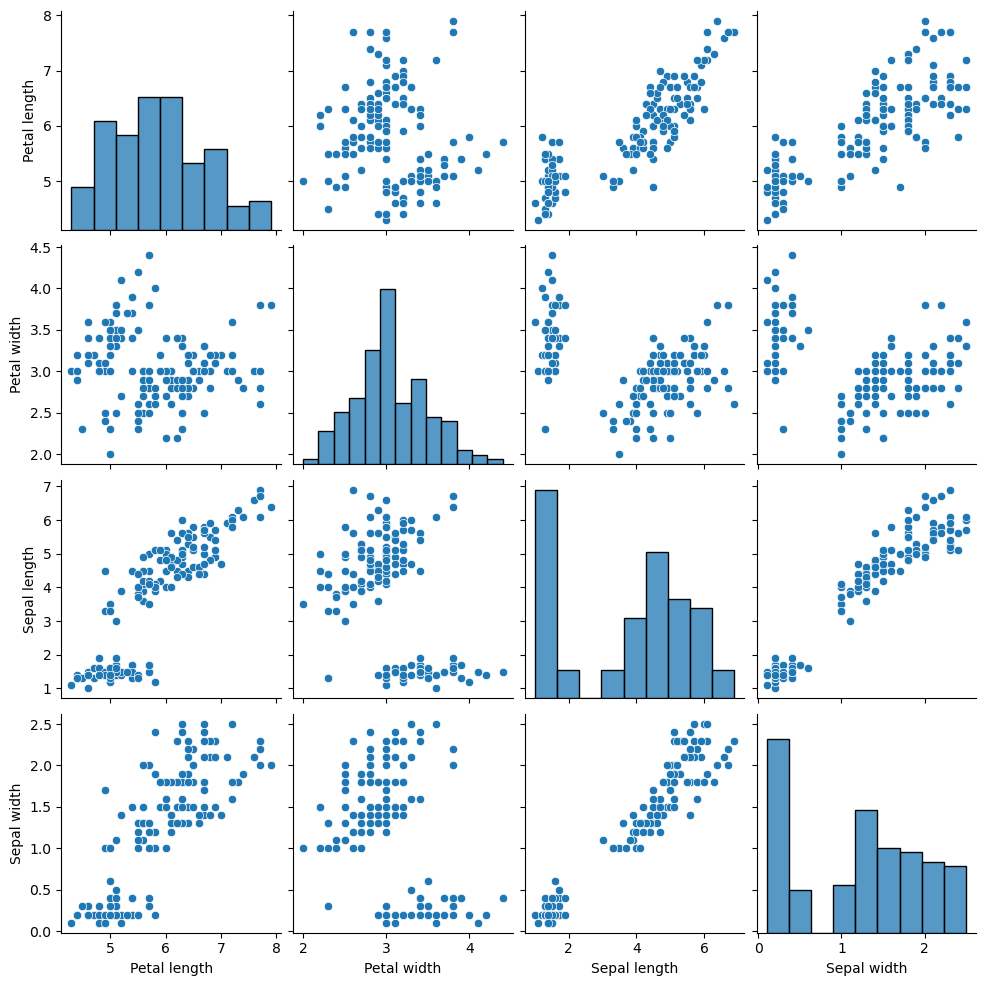

In [56]:
# plotting the graph between different features

sns.pairplot(data)

In [57]:
target = data['Species']
df = data.copy()
df = df.drop('Species',axis =1)
X = data.iloc[:,[0,1,2,3]].values

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Species'] = label.fit_transform(data['Species'])
data.shape

(150, 5)

In [58]:
# performing train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [59]:
# importing the decision tree classifier and creating the model for training 

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini') 

# training the model with the help of the training set 

classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
# prediction for the test data

y_pred = classifier.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(x_test)
print("classification report:",classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [62]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  6]], dtype=int64)

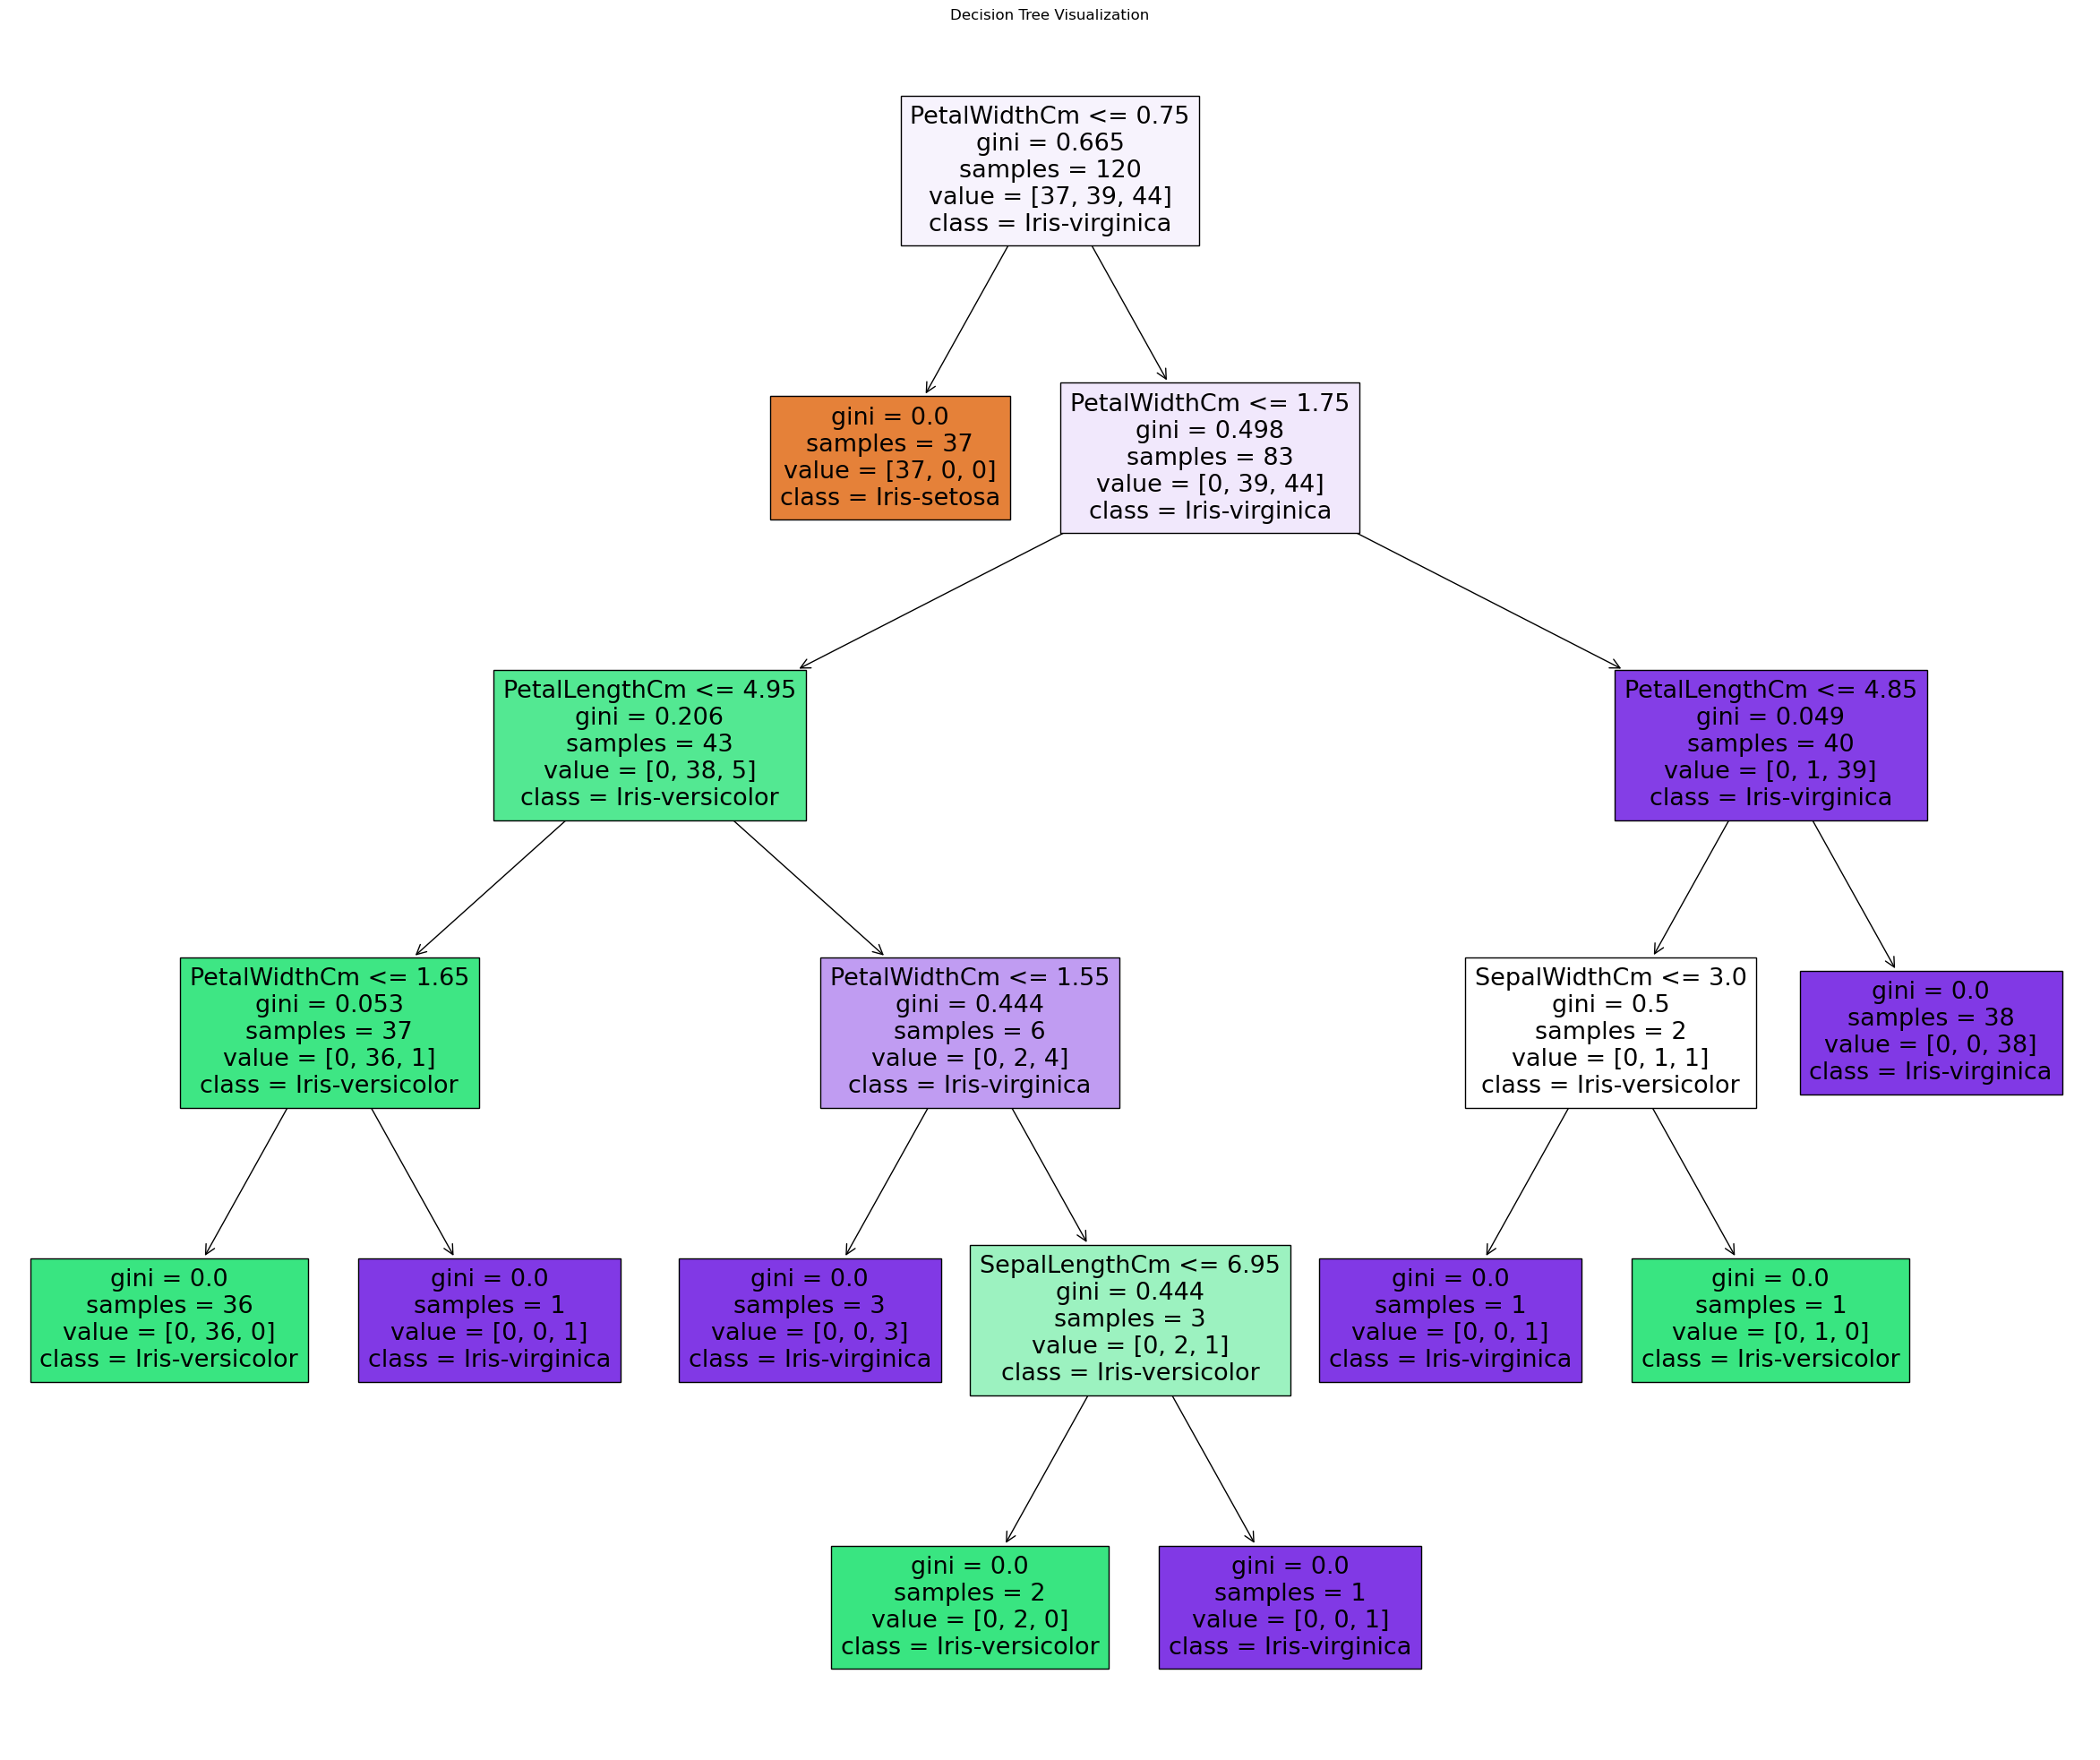

In [63]:
from sklearn import tree

plt.figure(figsize=(30,25))
dot_data = tree.plot_tree(classifier, 
                                feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                                filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [64]:
# calculating the accuracy of the model
from sklearn.metrics import accuracy_score, confusion_matrix

# accuracy score

ac = accuracy_score(y_test, y_pred)
print("Accuracy is : ", ac)

Accuracy is :  1.0
